<a href="https://colab.research.google.com/github/tackulus/229352/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab 04**

---

> **229352 Statistical Learning for Data Science 2**

> **Kasidis Torcharoen (610510531)**

In [1]:
import numpy as np
from sklearn import datasets 
mnist = datasets.load_digits()

**First, normalized the dataset to avoid numeric overflow.**

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(mnist.data)
y = mnist.target

**Then perform the following experiments:**

**1. In the first experiment, we will compare run time of the primal and dual optimization problems in S**

> **(a) For k ∈ {0, 5, 10, 15, 20, 25}, remove the first and the last k columns (features) from the dataset and perform the following steps:**

> **(b) Train an SVM model using sklearn.svm.LinearSVC method twice: one using the primal form and another using the dual form. This can be done by setting the model’s parameter dual to False and True, respectively. Also, set the max_iter parameter (maximum number of optimization steps) to be 10^7 to prevent any convergence warning**

> **(c) Measure the training times of both primal and dual form SVM. To measure the elapsed time in Python.**

In [3]:
from sklearn.svm import LinearSVC
from time import time

primal, dual = {}, {}
for k in range(0, 26, 5):
    if k == 0: Xk = X
    else: Xk = X[:, k:-k]
    for timer, b in zip([primal, dual], [False, True]):
        clf = LinearSVC( dual=b, max_iter=10**7 )
        start = time()
        clf.fit(Xk, y)
        end = time()
        timer[ X.shape[1] - 2 * k ] = end - start

**After you have done the above steps for all k, make plots of “# of features” vs “training time” for the primal form and the dual form. If someone asks you whether they should use the primal or dual form to train on their data, what would your answer be?**

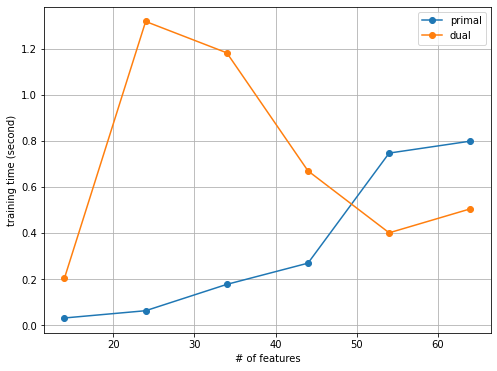

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))

for timer in [primal, dual]:
    plt.plot( *zip( *sorted(timer.items()) ), marker='o')

plt.legend(["primal", "dual"])
plt.xlabel("# of features")
plt.ylabel("training time (second)")
plt.grid()
plt.show()

In [5]:
X.shape

(1797, 64)

> The number of samples (1797) is more than the number of features (64), so I suggest to use the primal form.

**2. In the second experiment, we will study the relationships between the support vectors, the primal coefficient (w) and the dual coefficient (αi) in an SVM model.**

> **(a) From the (normalized) mini MNIST dataset, pick any two labels and train an SVM model using sklearn.svm.SVC on the data with those two labels.**

In [6]:
from sklearn.svm import SVC

k1, k2 = np.random.choice(mnist.target_names, size=2, replace=False)
index = np.where(y == k1)[0].tolist() + np.where(y == k2)[0].tolist()
index = sorted(index)
Xk, yk = X[index], y[index]
clf = SVC(kernel='linear')
clf.fit(Xk, yk)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

> **(b) How many support vectors does your model have? You can check the list of all support vectors by calling the attribute support vectors from your trained model.**

In [7]:
len(clf.support_vectors_)

27

> **(c) What is the relationship between the hyperparameter C and the number of support vectors? You might want to start with a small value of C such as 0.001. Can you give an explanation for this relationship?**

In [8]:
count = {}
for c in np.arange(0.001, 1.001, 0.001):
    clfx = SVC(C=c, kernel="linear")
    clfx.fit(Xk, yk)
    count[c] = len(clfx.support_vectors_)

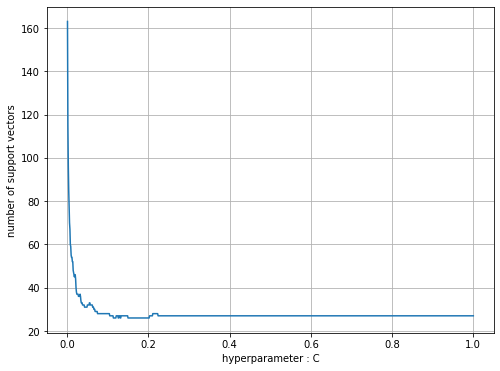

In [9]:
fig = plt.figure(figsize=(8, 6))
plt.plot( *zip( *sorted(count.items()) ) )

plt.xlabel("hyperparameter : C")
plt.ylabel("number of support vectors")
plt.grid()
plt.show()

> The hyperparameter C and the number of support vectors have negative relationship.

> **(d)  By  default,  your  model  has  been  trained  with  the  dual  form. Verify the SVM’s vector of coefficients formula by calling the following attributes from your trained model and check if the left-hand side of (4.1) is equal to the right-hand side.**

In [10]:
boo = clf.coef_ == clf.dual_coef_ @ clf.support_vectors_
boo.all()

True